### Author: Kubam Ivo 
### Purpose: Algorithms For Big Data Project
### Date: 25/3/2021

**Algorithm 1(eliminate points-m):** <br>
    **Input:** p1,p2,... , pn' (in order) where n' is the number of points in the stream.<br> 
    **Output**: Skyline points S' <br>
    1. Let x = 24m. 
    2. **Pass 1:** For j : 1, 2, ..., x, let p'j be a point picked uniformly at random from the stream. <br>
    Let S be the set of such points.<br>
    **Pass 2**
    4. for i = 1, ..., n' do 
         * for any p'j, if pi dominates p'j then p'j:=pi
    6. end for 
    7. Let S'={p'1,p'2,...,p'x}.
    8. **Pass 3** 
            Delete from stream all points in S' and all points dominated by any point in S'.
    9. return S' 

In [114]:
# generate points
import random

def generate_points(n):
    data = [(random.randint(1,100),random.randint(1,100)) for x in range(n)] 
    print('Stream contains', len(data), 'data points')
    return data

#stream = generate_points(1000)



In [126]:
# Class for algorithm 1: Eliminate-points (m)
import random
import numpy as np
class Eliminate:
    
    """ Class to generate m skyline points from n stream data """
    def __init__(self, m=3):
        self._m = m
        self._x = self._m * 24

    
    #reservoir sampling

    def reservoir_sample(self, stream):
        """Receives the sample generated data points and does to a reservoir sampling to return selected points """
        k = int(24*self._m)
        if k <  len(stream):
            reservoir = [stream[i] for i in range(k)]
        else:
            reservoir = stream[:]

        for i in range(k,len(stream)):
            j = random.randint(1,i)
            if j < k:
                reservoir[j] = stream[i]
        print(len(reservoir), 'points have been sample from the main stream into the reservoir sample')
        return reservoir

    # dominant points

    def dominate(self, stream, reservoir_point):
        """ Reeceives the selected points from reservoir sampling and replace any if dominated by a point in the stream data """
        dominant_point = reservoir_point [:]
        n = 0
        for i in range(len(stream)):
            sampled_elem = random.choice(dominant_point)

            x1, y1 = sampled_elem
            x2, y2 = stream[i]

            if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                n += 1
                #print('Point', stream[i], 'dominates and replaces', sampled_elem)        
                dominant_point[dominant_point.index(sampled_elem)] = stream[i]
        print('There were ', n, ' replacement done between the main stream and reservoir sample')
        print('Preview of dominant elements ')
        print(dominant_point[:10], '...')
        return dominant_point

    # Final pass
    def remove_point_stream(self, stream, skyline_points):
        """Delete from stream data all points dominated by points skyline points or points found in skyline points"""
        output_stream = []
        for point in stream:
            if point not in skyline_points:

                output_stream.append(point)
        print('There are ' , len(output_stream), 'points in the main stream which are not dominant points')

        n = 0
        for point in skyline_points:
            x2, y2 = point
        
            for elem in output_stream:
                x1, y1 = elem
                if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                    output_stream.remove(elem)
                    n +=1
        print(n, 'points in the main stream were remove because they were dominated')
        print(len(output_stream), ' points are left in the stream')
        return output_stream
    
    


In [ ]:
# version Two: Eliminate-points (m)

In [96]:
%%time
import sys
stream = generate_points(10000)
output_stream = stream[:]

sys.getsizeof(stream)

Stream contains 10000 data points
Wall time: 40.2 ms


87616

In [95]:
%%time
import math
n= len(output_stream)
m = 2
test = Eliminate(m)
reservoir_pts = test.reservoir_sample(output_stream)
sky_pts = test.dominate(output_stream,reservoir_pts)
output_stream = test.remove_point_stream(output_stream,sky_pts)
print(output_stream)

48 points have been sample from the main stream into the reservoir sample
There were  135  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(95, 100), (100, 90), (100, 42), (96, 97), (99, 85), (100, 91), (100, 87), (99, 95), (100, 85), (88, 100)] ...
There are  9909 points in the main stream which are not dominant points
9908 points in the main stream were remove because they were dominated
1  points are left in the stream
[(87, 100)]
Wall time: 615 ms


Algorithm 2 (Streaming RAND): 
    1: Let n be the number of points in the input stream. 
    Let m' = 1. 
    2: while the input stream is not empty do: 
    3: let n' be the current number of points in the stream 
    4: Call eliminate points (m'log(nlogn))
    5: If more than n'/2 points are left in the stream, m' = 2 m'
    6: end while 
    Remark: In case the stream cannot be changed, we do not have to actually delete points from stream. 
    We only keep the skyline points found so far and consider only points in the stream that is not dominated by any found skyline points. 
        

In [52]:
%%time
m= 1
stream = generate_points(10000)
output_stream = stream[:]
n = len(stream)
n_prime = len(stream)

Stream contains 10000 data points
Wall time: 39.6 ms


In [53]:
%%time
import math

m = int(m*math.log(n*math.log(n)))
while n_prime > 0:
    test = Eliminate(m)
    reservoir_pts = test.reservoir_sample(output_stream)
    sky_pts = test.dominate(output_stream,reservoir_pts)
    output_stream = test.remove_point_stream(output_stream,sky_pts)
    n_prime = len(output_stream)
    if n_prime > n/2:
        m = 2*m
    else:
        break


    


264 points have been sample from the main stream into the reservoir sample
There were  452  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(95, 97), (93, 93), (96, 66), (98, 87), (98, 77), (95, 92), (95, 97), (98, 96), (76, 95), (98, 100)] ...
There are  9573 points in the main stream which are not dominant points
9573 points in the main stream were remove because they were dominated
0  points are left in the stream
Wall time: 612 ms


## Fixed Window

### Random Access

In [131]:
import time
import math
stream = generate_points(10000)
w = int(0.01 * len(stream)) # getting the number of points using window size of 0.01.
output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
n = len(output_stream)

Stream contains 10000 data points


In [132]:

tic = time.perf_counter()  # starts the timer
# simple running the elimate algorithm with w/24
while n > 0:
    test = Eliminate(w/24)
    reservoir_pts = test.reservoir_sample(output_stream)
    sky_pts = test.dominate(output_stream,reservoir_pts)
    output_stream = test.remove_point_stream(output_stream,sky_pts)
    n = len(output_stream)
toc = time.perf_counter()
print("Execution time: ", toc - tic)

100 points have been sample from the main stream into the reservoir sample
There were  222  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(98, 73), (98, 90), (99, 99), (99, 82), (100, 99), (95, 95), (81, 92), (93, 85), (84, 91), (95, 95)] ...
There are  9843 points in the main stream which are not dominant points
9842 points in the main stream were remove because they were dominated
1  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  0  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(100, 98)] ...
There are  0 points in the main stream which are not dominant points
0 points in the main stream were remove because they were dominated
0  points are left in the stream
Execution time:  0.7148922000014863


In [143]:
# varying the stream size
exec_time = []
for size in range(10000,100000,10000):
    stream = generate_points(size)
    w = int(0.01 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time.append(toc - tic)
    print("\n")
    

Stream contains 10000 data points
100 points have been sample from the main stream into the reservoir sample
There were  220  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(89, 83), (85, 100), (100, 89), (99, 89), (96, 99), (84, 99), (98, 96), (95, 99), (90, 95), (72, 97)] ...
There are  9845 points in the main stream which are not dominant points
9845 points in the main stream were remove because they were dominated
0  points are left in the stream
Execution time:  0.6079027000014321


Stream contains 20000 data points
200 points have been sample from the main stream into the reservoir sample
There were  483  replacement done between the main stream and reservoir sample
Preview of dominant elements 
[(99, 77), (92, 96), (93, 100), (99, 100), (87, 99), (96, 75), (96, 82), (98, 95), (100, 100), (53, 100)] ...
There are  19593 points in the main stream which are not dominant points
19593 points in the main stream were remove because they wer

Text(0.5, 1.0, 'Runtime')

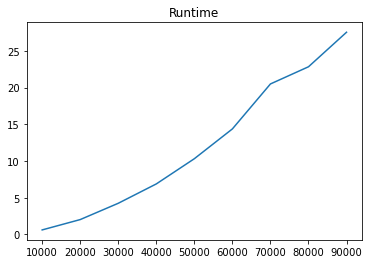

In [145]:
import matplotlib.pyplot as plt
n_list = []
for size in range(10000,100000,10000):
    n_list.append(size)

plt.plot(n_list,exec_time)
plt.title("Runtime")
